# Cross Validation

The purpose of this section is to investigate whether (and how well) cross validation can recover the true sparsity parameter $k$. We tested normal, logistic, and poisson cross validation results using 5 fold cross validation across 20 different model sizes $k \in \{1,2,...,20\}$ where $k_{true} = 10$. Since the purpose is on validating cross validation and not to test scalability, we ran code on 5000 samples and 100000 SNPs.

In [1]:
versioninfo()

Julia Version 1.0.3
Commit 099e826241 (2018-12-18 01:34 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-3740QM CPU @ 2.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, ivybridge)


In [81]:
# using StatsPlots
using DelimitedFiles
using Statistics
using Plots
using PyPlot
myfont=font(20,"Helvitica")

Plots.Font("Helvitica", 20, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0))

In [33]:
using DelimitedFiles
using Statistics
using RCall
R"library(ggplot2)"

RObject{StrSxp}
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [3]:
normal_cv_drs       = readdlm("normal_cv_drs") #drs stands for deviance residuals = MSEs
normal_cv_memory    = readdlm("normal_cv_memory")
normal_cv_run_times = readdlm("normal_cv_run_times")

normal_cv_drs_nodebias       = readdlm("normal_nodebias_cv_drs")
normal_cv_memory_nodebias    = readdlm("normal_nodebias_cv_memory")
normal_cv_run_times_nodebias = readdlm("normal_nodebias_cv_run_times")

logistic_cv_drs       = readdlm("logistic_cv_drs")
logistic_cv_memory    = readdlm("logistic_cv_memory")
logistic_cv_run_times = readdlm("logistic_cv_run_times")

logistic_cv_drs_nodebias       = readdlm("logistic_nodebias_cv_drs")
logistic_cv_memory_nodeibas    = readdlm("logistic_nodebias_cv_memory")
logistic_cv_run_times_nodebias = readdlm("logistic_nodebias_cv_run_times")

poisson_cv_drs       = readdlm("poisson_cv_drs")
poisson_cv_memory    = readdlm("poisson_cv_memory")
poisson_cv_run_times = readdlm("poisson_cv_run_times")

poisson_cv_drs_nodebias       = readdlm("poisson_nodebias_cv_drs")
poisson_cv_memory_nodeibas    = readdlm("poisson_nodebias_cv_memory")
poisson_cv_run_times_nodebias = readdlm("poisson_nodebias_cv_run_times")

# negativebinomial_cv_drs       = readdlm("negativebinomial_cv_drs")
# negativebinomial_cv_memory    = readdlm("negativebinomial_cv_memory")
# negativebinomial_cv_run_times = readdlm("negativebinomial_cv_run_times")

negativebinomial_cv_drs_nodebias       = readdlm("negativebinomial_nodebias_cv_drs")
negativebinomial_cv_memory_nodeibas    = readdlm("negativebinomial_nodebias_cv_memory")
negativebinomial_cv_run_times_nodebias = readdlm("negativebinomial_nodebias_cv_run_times")

30×1 Array{Float64,2}:
 285.06390422 
 279.863911513
 280.971510584
 431.862610731
 289.931125916
 378.358364206
 364.320530149
 276.451211526
 314.747621389
 376.989917192
 298.231620678
 300.275857518
 317.302010672
   ⋮          
 284.388087417
 335.846065974
 278.40745999 
 305.376373567
 396.983519913
 265.265364679
 301.87676002 
 345.313536423
 288.769732323
 317.442022881
 269.808993075
 304.894038015

# Normal cv plot

11.0


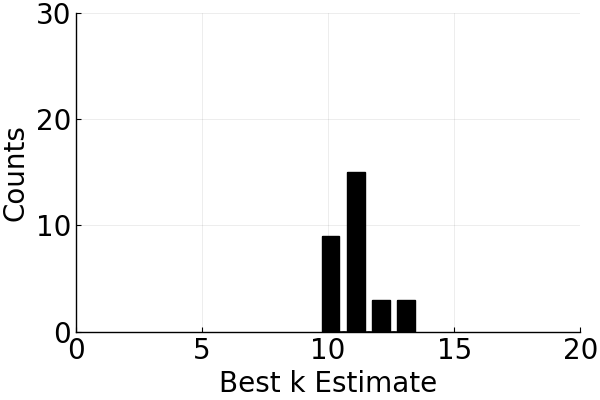

In [85]:
best_k_normal = zeros(30)
for i in 1:30
    best_k_normal[i] = argmin(normal_cv_drs[:, i])
end
println(median(best_k_normal))

normal_bar = histogram(best_k_normal, ylim = (0, 30), xlim = (0, 20), legend=false, bar_width=0.7,
     color = :black, ylabel="Counts", bins=20, xlabel="Best k Estimate", 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)

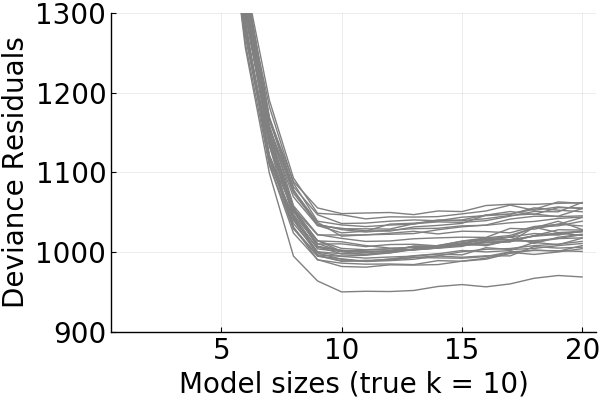

In [86]:
models = collect(1:20)
mylabels = Matrix{String}(undef, 1, 30)
for i in 1:30
    mylabels[1, i] = "run $i"
end
normal_plt = Plots.plot(models, normal_cv_drs, label=mylabels, legend=false, 
    color = :grey, ylabel = "Deviance Residuals", xlabel = "Model sizes (true k = 10)", 
    ylim = (900, 1300), 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)

# Logistic CV plot 

9.0


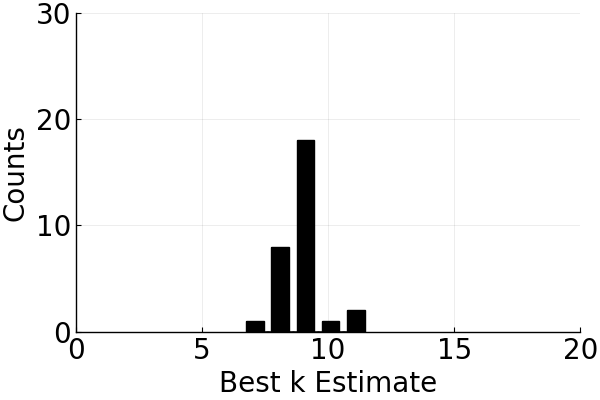

In [87]:
best_k_logistic = zeros(30)
for i in 1:30
    best_k_logistic[i] = argmin(logistic_cv_drs[:, i])
end
println(median(best_k_logistic))

logistic_bar = histogram(best_k_logistic, ylim = (0, 30), xlim = (0, 20), legend=false, 
    color = :black, xlabel="Best k Estimate", bins=20, bar_width=0.7, 
    ylabel="Counts", 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)

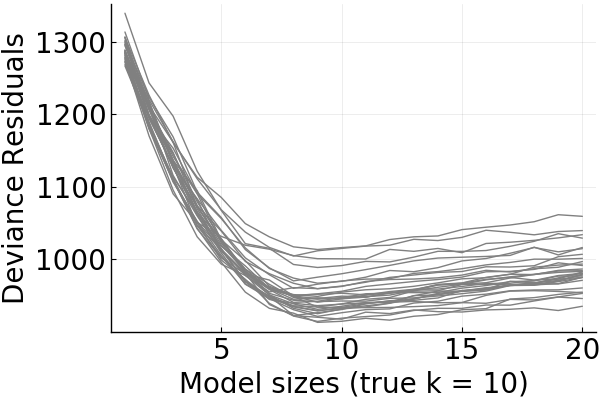

In [88]:
logistic_plt = Plots.plot(models, logistic_cv_drs, label=mylabels, legend=false, 
    color = :grey, xlabel = "Model sizes (true k = 10)", ylabel = "Deviance Residuals", 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)

# Poisson CV plot

10.0


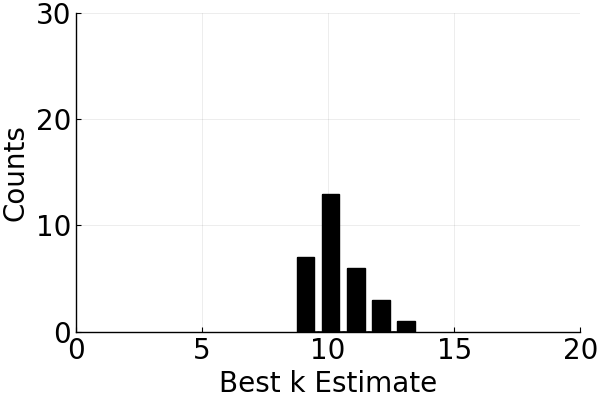

In [89]:
best_k_poisson = zeros(30)
for i in 1:30
    best_k_poisson[i] = argmin(poisson_cv_drs_nodebias[:, i])
end
println(median(best_k_poisson))

poisson_bar = histogram(best_k_poisson, ylim = (0, 30), xlim = (0, 20), legend=false, 
    color = :black, bins=20, xlabel="Best k Estimate", bar_width=0.7,
    ylabel="Counts", tickfont=myfont, legendfont=myfont, guidefont=myfont)

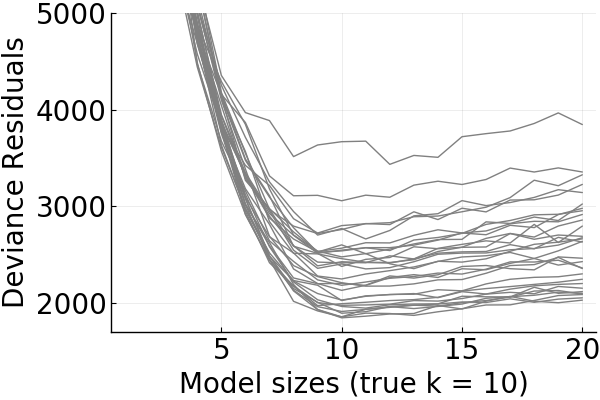

In [90]:
poisson_plt = Plots.plot(models, poisson_cv_drs_nodebias, color = :grey, 
    label=mylabels, legend=false, ylabel = "Deviance Residuals",
    xlabel = "Model sizes (true k = 10)", ylim=(1700, 5000), tickfont=myfont, 
    legendfont=myfont, guidefont=myfont)

# Negative Binomial Plots

best_k_negbin = [10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 10.0, 10.0, 10.0, 10.0]
10.0


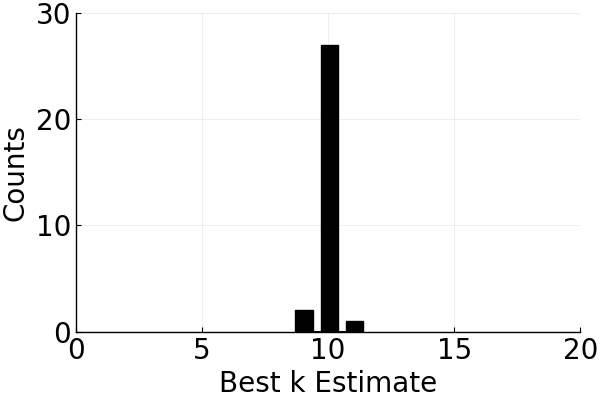

In [91]:
best_k_negbin = zeros(30)
for i in 1:30
    best_k_negbin[i] = argmin(negativebinomial_cv_drs_nodebias[:, i])
end
@show best_k_negbin
println(median(best_k_negbin))

negativebinomial_bar = histogram(best_k_negbin, ylim = (0, 30), xlim = (0, 20), legend=false, 
    color = :black, bins=20, xlabel="Best k Estimate", bar_width=0.7,
    ylabel="Counts", 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)

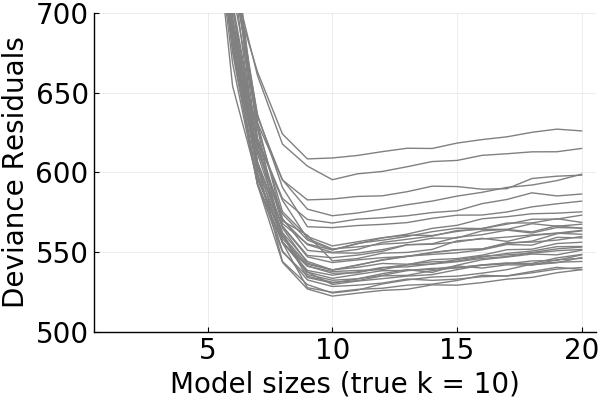

In [92]:
negativebinomial_plt = Plots.plot(models, negativebinomial_cv_drs_nodebias, color = :grey,
    label=mylabels, legend=false, ylabel = "Deviance Residuals", 
    xlabel = "Model sizes (true k = 10)", ylim=(500, 700), 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)

# Save figs in high resolution

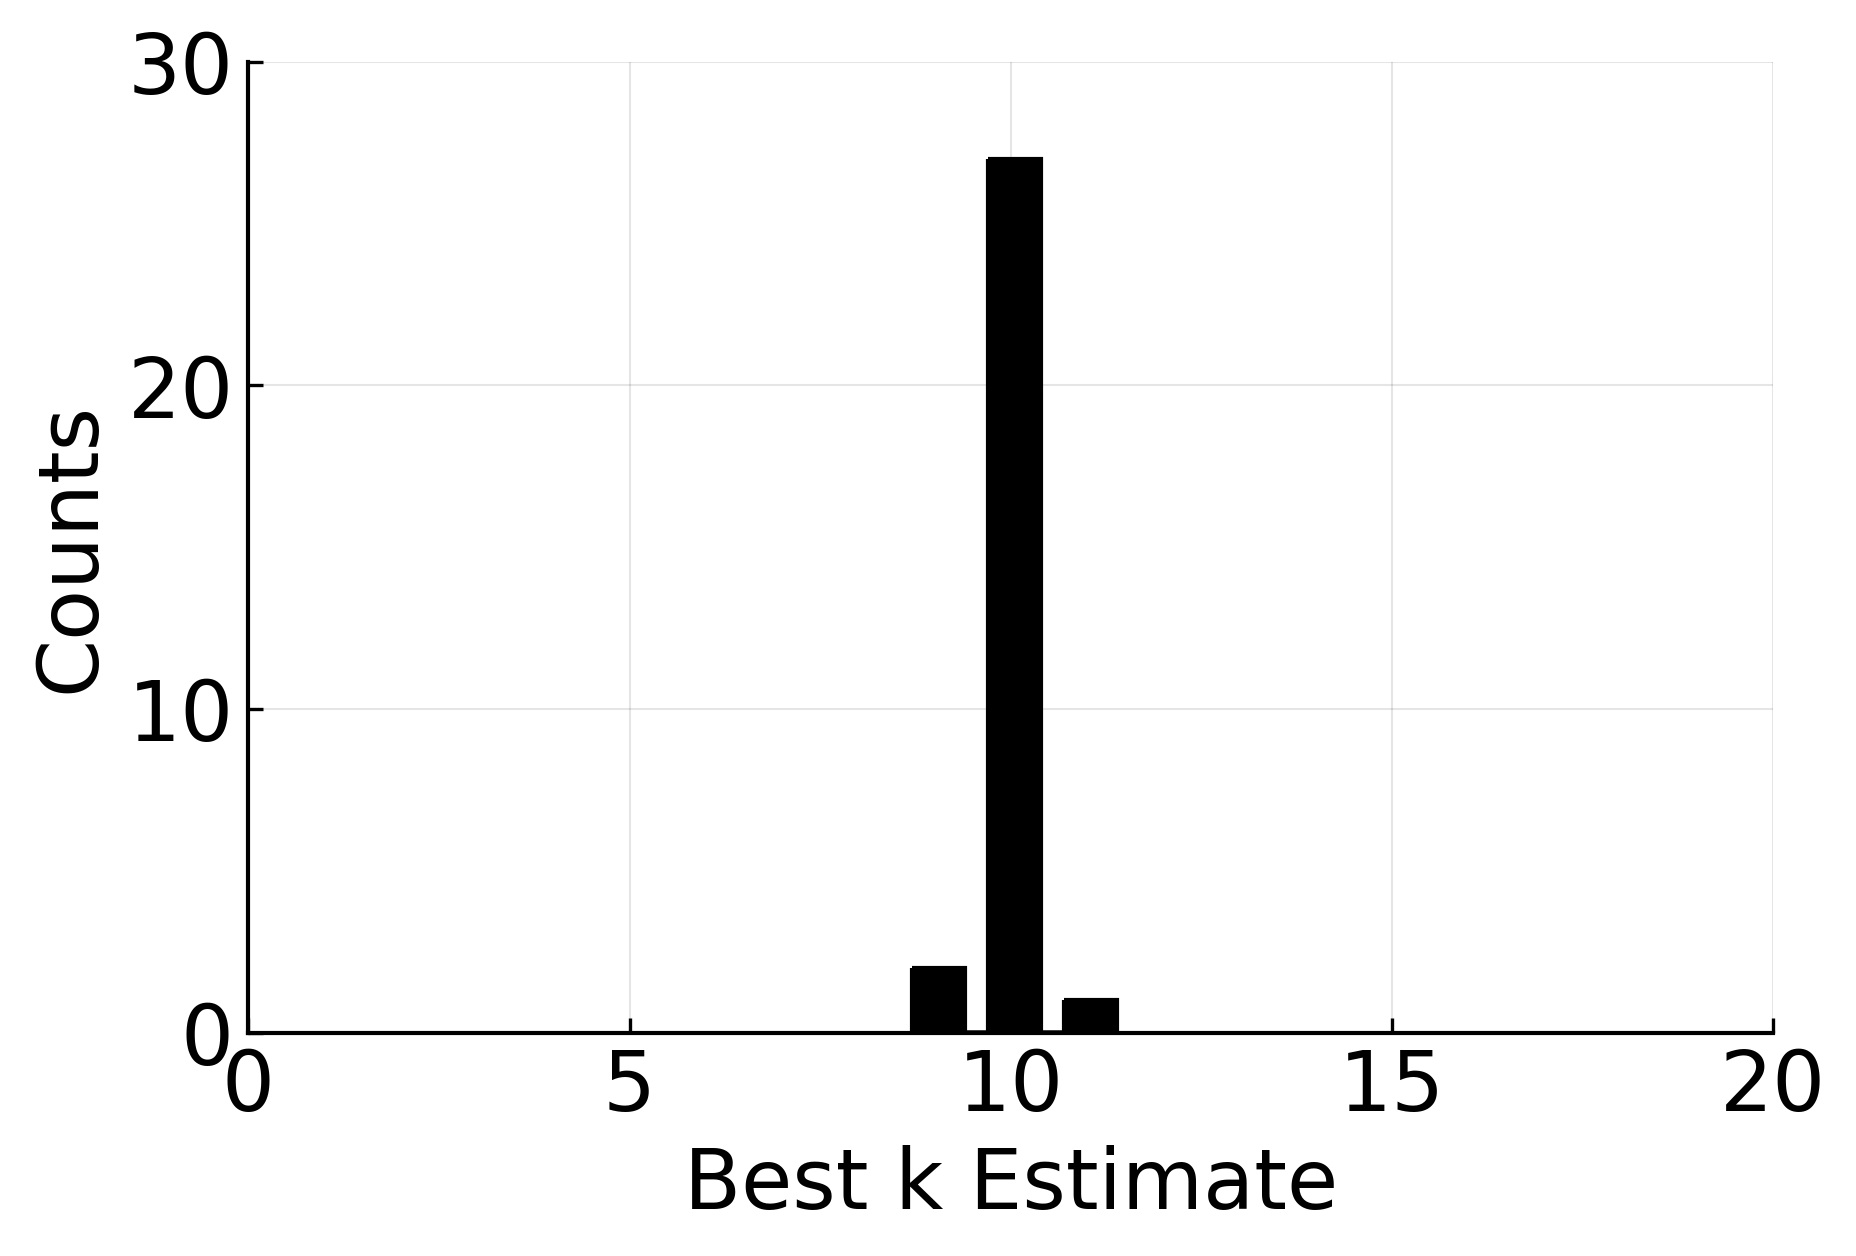

In [93]:
normal_bar = histogram(best_k_normal, ylim = (0, 30), xlim = (0, 20), legend=false, bar_width=0.7,
     color = :black, ylabel="Counts", bins=20, xlabel="Best k Estimate", dpi=300, 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)
normal_plt = Plots.plot(models, normal_cv_drs, label=mylabels, legend=false, 
    color = :grey, ylabel = "Deviance Residuals", xlabel = "Model sizes (true k = 10)", 
    ylim = (900, 1300), dpi=300, 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)
logistic_bar = histogram(best_k_logistic, ylim = (0, 30), xlim = (0, 20), legend=false, 
    color = :black, xlabel="Best k Estimate", bins=20, bar_width=0.7, 
    ylabel="Counts", dpi=300, 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)
logistic_plt = Plots.plot(models, logistic_cv_drs, label=mylabels, legend=false, dpi=300,
    color = :grey, xlabel = "Model sizes (true k = 10)", ylabel = "Deviance Residuals", 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)
poisson_bar = histogram(best_k_poisson, ylim = (0, 30), xlim = (0, 20), legend=false, 
    color = :black, bins=20, xlabel="Best k Estimate", bar_width=0.7,
    ylabel="Counts", dpi=300, 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)
poisson_plt = Plots.plot(models, poisson_cv_drs_nodebias, color = :grey, 
    label=mylabels, legend=false, ylabel = "Deviance Residuals",
    xlabel = "Model sizes (true k = 10)", ylim=(1700, 5000), dpi=300, 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)
negativebinomial_bar = histogram(best_k_negbin, ylim = (0, 30), xlim = (0, 20), legend=false, 
    color = :black, bins=20, xlabel="Best k Estimate", bar_width=0.7,
    ylabel="Counts", dpi=300, 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)
negativebinomial_plt = Plots.plot(models, negativebinomial_cv_drs_nodebias, color = :grey,
    label=mylabels, legend=false, ylabel = "Deviance Residuals", 
    xlabel = "Model sizes (true k = 10)", ylim=(500, 700), dpi=300, 
    tickfont=myfont, legendfont=myfont, guidefont=myfont)

Plots.savefig(normal_plt, "normal_plt")
Plots.savefig(logistic_plt, "logistic_plt")
Plots.savefig(poisson_plt, "poisson_plt")
Plots.savefig(negativebinomial_plt, "negativebinomial_plt")
Plots.savefig(normal_bar, "normal_bar")
Plots.savefig(logistic_bar, "logistic_bar")
Plots.savefig(poisson_bar, "poisson_bar")
Plots.savefig(negativebinomial_bar, "negativebinomial_bar")